In [26]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim import SGD

In [27]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)) # flattens the data
])

In [28]:
batch_size = 64

trainset = datasets.MNIST(root='./data2', train=True,
                                        download=True, transform=transforms)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./data2', train=False,
                                       download=True, transform=transforms)
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [36]:
# No. of samples in trainset
len(trainloader) * batch_size

60032

In [37]:
# No. of samples in testset
len(testloader) * batch_size

10048

In [29]:
class LinearRegression(nn.Module):
    def __init__(self, x_dim, y_dim):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(x_dim,y_dim)
    
    def forward(self,X):
        return self.linear(X)

In [30]:
x_dim = trainset[0][0].shape[0]
y_dim = 1
model = LinearRegression(x_dim,y_dim)
criterion = nn.MSELoss()
epochs = 100
lr = 0.01
optimizer = SGD(model.parameters(),lr=lr)
losses = []

In [31]:
for epoch in range(epochs):
    epoch_loss = 0
    for xi,yi in trainloader:
        
        yi = yi.float().view(-1,1)
        output = model(xi)
        loss = criterion(output,yi)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(trainloader)
    losses.append(avg_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

Epoch 1/100, Loss: 3.9178360982744422
Epoch 2/100, Loss: 3.419492652421313
Epoch 3/100, Loss: 3.363532566185445
Epoch 4/100, Loss: 3.3418633364665227
Epoch 5/100, Loss: 3.3226892150033005
Epoch 6/100, Loss: 3.3088090112214403
Epoch 7/100, Loss: 3.306716131376051
Epoch 8/100, Loss: 3.3013942512367835
Epoch 9/100, Loss: 3.3026482314189107
Epoch 10/100, Loss: 3.3005413879463665
Epoch 11/100, Loss: 3.2953517832227353
Epoch 12/100, Loss: 3.2951755490638552
Epoch 13/100, Loss: 3.2903233127299147
Epoch 14/100, Loss: 3.296602022927453
Epoch 15/100, Loss: 3.288937729558965
Epoch 16/100, Loss: 3.2911199191485894
Epoch 17/100, Loss: 3.2924367457564707
Epoch 18/100, Loss: 3.2858713161208226
Epoch 19/100, Loss: 3.2842532398858304
Epoch 20/100, Loss: 3.2891080671790314
Epoch 21/100, Loss: 3.2862608295513875
Epoch 22/100, Loss: 3.2829277293005985
Epoch 23/100, Loss: 3.2877606644050905
Epoch 24/100, Loss: 3.2821920477251
Epoch 25/100, Loss: 3.282491192761769
Epoch 26/100, Loss: 3.2894695397379046
Epoc

Text(0, 0.5, 'Loss')

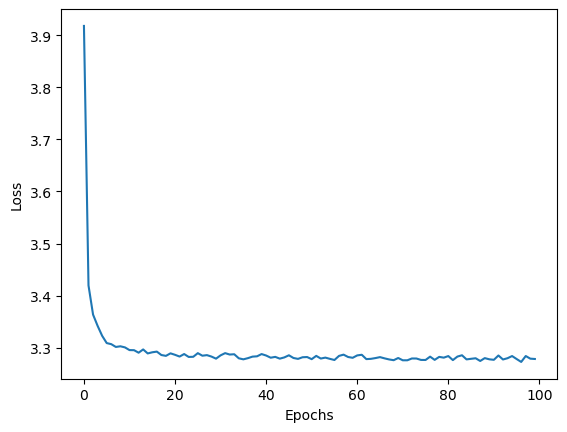

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses,label = 'loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [42]:
PATH = './mnistmodel.pth'
torch.save(model.state_dict(), PATH)

In [44]:
from sklearn.metrics import r2_score

model.eval()
test_loss = 0
all_outputs = []
all_targets = []
with torch.no_grad(): 
    for xi, yi in testloader:
        yi = yi.float().view(-1, 1)
        output = model(xi)
        loss = criterion(output, yi)
        test_loss += loss.item()

        all_outputs.append(output)
        all_targets.append(yi)

all_outputs = torch.cat(all_outputs).numpy()
all_targets = torch.cat(all_targets).numpy()

avg_test_loss = test_loss / len(testloader)
print(f'Test Loss: {avg_test_loss}')
print(f'R2 Score: {r2_score(all_targets,all_outputs)}')


Test Loss: 3.167931084420271
R2 Score: 0.6223676204681396
